In [44]:
#first import all required libraries:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [45]:
dataset=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
dataset.describe()  #summarize the data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
dataset.shape

(264836, 8)

In [6]:
dataset.isnull().sum() #to find out the null values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

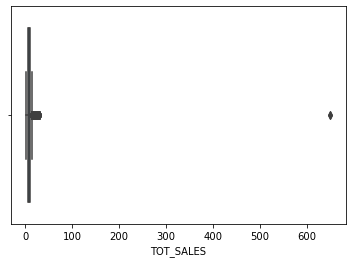

In [7]:
sns.boxplot(dataset.TOT_SALES)   #to find out outliers

In [8]:
numericdata=dataset.select_dtypes(['float','int'])   #to remove outliers first convert the dtype into numeric

In [9]:
numericdata.head()

,TOT_SALES
0,6.0
1,6.3
2,2.9
3,15.0
4,13.8


In [10]:
x=numericdata[numericdata['TOT_SALES']< 10.00] #do not exceed beyond 12 as it will not remove the outlier

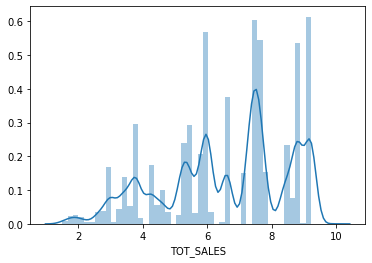

In [11]:
sns.distplot(x.TOT_SALES,kde=True)  #as it is continuous variable

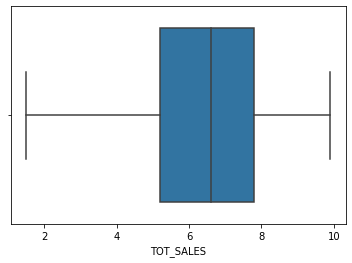

In [12]:
sns.boxplot(x.TOT_SALES)

In [13]:
mean=x['TOT_SALES'].mean() #you can also check mean value again to check outlier is gone or not

In [14]:
mean

6.534666531109058

In [15]:
dataset.dtypes  #checking data formats

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [18]:
dataset2=pd.read_csv('QVI_purchase_behaviour.csv')

In [19]:
dataset2.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [20]:
dataset2.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


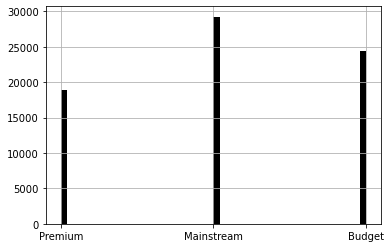

In [21]:
dataset2['PREMIUM_CUSTOMER'].hist(bins=50,color='black') #mainstream has highest freq,so max sale from this area

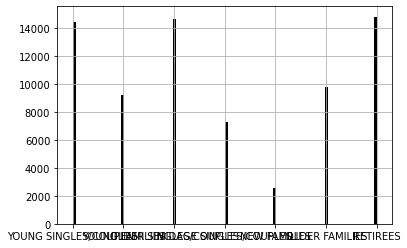

In [22]:
dataset2['LIFESTAGE'].hist(bins=100,color='black')  #young singles/couples, retires, older singles/couples = highest sale 

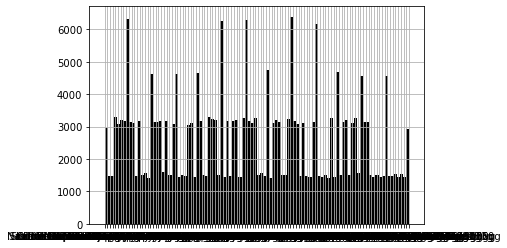

In [23]:
dataset['PROD_NAME'].hist(bins=100,color='black')

In [24]:
dataset.dataframeName = 'QVI_transaction_data.xlsx'

In [25]:
#Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')# w=white,k=black,dpi=size of graph
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90) #corr.columns used to label corresponding col.like date,store,etc
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()  #get current axex and we get names on x-axis due to bottom function 
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

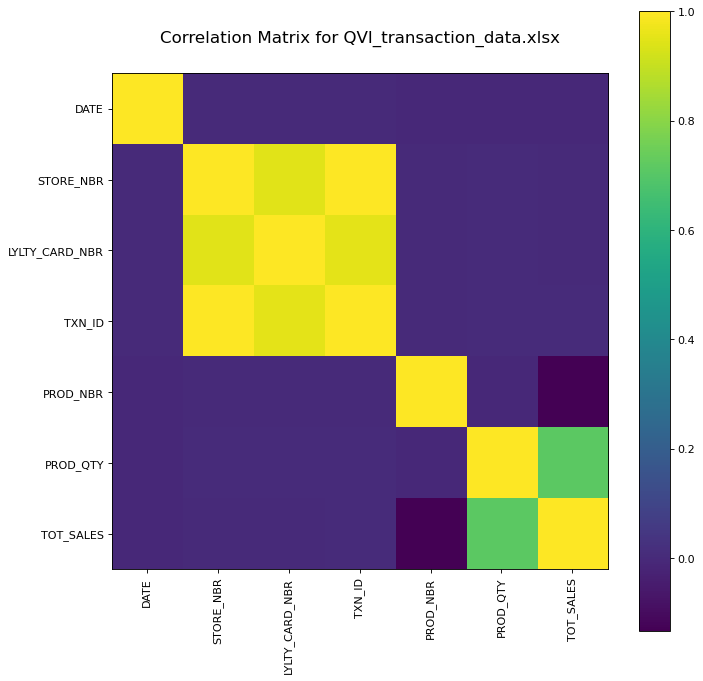

In [26]:
plotCorrelationMatrix(dataset, 10)

In [27]:
#it shows positive corelationn as bottom left sided area is same as upper right area 

In [28]:
dataset['pack_size']=dataset['PROD_NAME'].str.extract('(\d+)').astype(int) #to extract the feature from prod_name
dataset['pack_size']

0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: pack_size, Length: 264836, dtype: int32

In [29]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [30]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    dataset['PROD_NAME'] = dataset['PROD_NAME'].str.replace(char, ' ')

In [31]:
numbers=['1','2','5','0','7','3','4','8','9'] #to remove nos,pack_size
for no in numbers:
    dataset['PROD_NAME'] = dataset['PROD_NAME'].str.replace(no, ' ')

In [32]:
dataset['PROD_NAME']=dataset['PROD_NAME'].str[:-1] #to remove g

In [33]:
dataset['pack_size']=dataset['pack_size'].astype(str)+'g' #to add g as suffix

In [34]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150g


In [41]:
dataset.groupby('PROD_NAME').size().sort_values(ascending=False)

PROD_NAME
  Original                              4673
  Mozzarella   Basil   Pesto            3304
  Tortilla ChpsHny Jlpno Chili          3296
  Popd Swt Chlli  Sr Cream Chips        3269
  Crisps     Ched   Chives  6           3268
                                        ... 
  Pc Sea Salt      6                    1431
  Medium   Salsa                        1430
  Sour Cream      Garden Chives         1419
  Fries Potato Chips                    1418
  Crinkle Cut      Original             1410
Length: 113, dtype: int64

In [46]:
new1=dataset['PROD_NAME'].str.split(" ", n = 1, expand = True) 
  
dataset['BRAND']=new1[0]
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [ ]:
brand=dataset['BRAND']
for items in brand:
    dataset['PROD_NAME']=dataset['PROD_NAME'].str.replace(items,' ')

In [50]:
dataset.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,43390,1,1000,1,5,Chip Compny SeaSalt175g,2,6.0,Natural
1,43599,1,1307,348,66,Nacho Cheese 175g,3,6.3,CCs
2,43605,1,1343,383,61,Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,43329,2,2373,974,69,Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,43330,2,2426,1038,108,Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
5,43604,4,4074,2982,57,El Paso Salsa Dip Tomato Mild 300g,1,5.1,Old
6,43601,4,4149,3333,16,Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths
7,43601,4,4196,3539,24,Waves Sweet Chilli 210g,1,3.6,Grain
8,43332,5,5026,4525,42,Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos
9,43330,7,7150,6900,52,Waves Sour Cream&Chives 210G,2,7.2,Grain


In [ ]:
#extracted features like pack size,brand name from product name
#found out highest sale by which lifestage
# used corelation matrix to find out relation between attributes given
#removed outliers